# 서울시 구별 CCTV현황 분석

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)
import seaborn as sns

In [2]:
df = pd.read_excel('./과제data/서울시 자치구 년도별 CCTV 설치 현황(2011년 이전_2018년).xlsx')
df.head()

,기관명,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [3]:
df.rename(columns={
    '기관명' : '구별'
},inplace=True)
df.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [4]:
df2 = pd.read_table('./과제data/report.txt' , header=2, thousands = ',') # thousands = ',' 로 숫자단위를 지정하던 , 없애기
df2.head()

,기간,자치구,세대,계,남자,여자,계.1,남자.1,여자.1,계.2,남자.2,여자.2,세대당인구,65세이상고령자
0,2020.3/4,합계,4405833,9953009,4840912,5112097,9699232,4719170,4980062,253777,121742,132035,2.20,1552356
1,2020.3/4,종로구,74861,159842,77391,82451,149952,73024,76928,9890,4367,5523,2.00,28396
2,2020.3/4,중구,63594,135321,66193,69128,125800,61526,64274,9521,4667,4854,1.98,24265
3,2020.3/4,용산구,112451,244953,119074,125879,229786,110604,119182,15167,8470,6697,2.04,39995
4,2020.3/4,성동구,136096,302695,147582,155113,295591,144444,151147,7104,3138,3966,2.17,45372


In [5]:
# 필요없는데이터 지우기
del df2['세대']
del df2['남자']
del df2['여자']
del df2['남자.1']
del df2['여자.1']
del df2['남자.2']
del df2['여자.2']
del df2['세대당인구']
del df2['기간']
df2.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,9953009,9699232,253777,1552356
1,종로구,159842,149952,9890,28396
2,중구,135321,125800,9521,24265
3,용산구,244953,229786,15167,39995
4,성동구,302695,295591,7104,45372


In [6]:
# 합계 지우기
df2.drop([0], inplace=True)
df2.head()

,자치구,계,계.1,계.2,65세이상고령자
1,종로구,159842,149952,9890,28396
2,중구,135321,125800,9521,24265
3,용산구,244953,229786,15167,39995
4,성동구,302695,295591,7104,45372
5,광진구,361923,348064,13859,50047


In [7]:
df2.rename({'자치구': '구별', '계': '인구수', '계.1': '내국인', '계.2': '외국인', '65세이상고령자': '고령자'}, inplace=True, axis=1)

In [8]:
df.head()

,구별,소계,2011년 이전,2012년,2013년,2014년,2015년,2016년,2017년,2018년
0,강 남 구,5221,1944.0,195.0,316.0,430,546,765,577,448
1,강 동 구,1879,303.0,387.0,134.0,59,144,194,273,385
2,강 북 구,1265,243.0,88.0,141.0,74,145,254,1,319
3,강 서 구,1617,219.0,155.0,118.0,230,187,190,264,254
4,관 악 구,3985,430.0,56.0,419.0,487,609,619,694,671


In [9]:
cctv = pd.DataFrame(df[['구별','2016년','2017년','2018년']])
cctv.head()

,구별,2016년,2017년,2018년
0,강 남 구,765,577,448
1,강 동 구,194,273,385
2,강 북 구,254,1,319
3,강 서 구,190,264,254
4,관 악 구,619,694,671


In [10]:
cctv['소계'] = cctv['2016년'] + cctv['2017년'] + cctv['2018년']
cctv.head()

,구별,2016년,2017년,2018년,소계
0,강 남 구,765,577,448,1790
1,강 동 구,194,273,385,852
2,강 북 구,254,1,319,574
3,강 서 구,190,264,254,708
4,관 악 구,619,694,671,1984


In [11]:
cctv['최근증가율'] = (cctv['2016년'] + cctv['2017년'] + cctv['2018년']) / (df['2013년'] + df['2014년'] + df['2015년']) * 100
cctv.head()

,구별,2016년,2017년,2018년,소계,최근증가율
0,강 남 구,765,577,448,1790,138.544892
1,강 동 구,194,273,385,852,252.818991
2,강 북 구,254,1,319,574,159.444444
3,강 서 구,190,264,254,708,132.336449
4,관 악 구,619,694,671,1984,130.957096


In [12]:
cctv.sort_values(by='최근증가율', ascending=False).head()

,구별,2016년,2017년,2018년,소계,최근증가율
5,광 진 구,21,468,346,835,356.837607
15,성 동 구,201,933,294,1428,299.371069
12,마 포 구,359,372,195,926,293.037975
1,강 동 구,194,273,385,852,252.818991
18,양 천 구,349,137,830,1316,250.190114


In [13]:
# 다 잘나옴
df2['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [14]:
df2['외국인비율'] = df2['외국인'] / df2['인구수'] * 100
df2['고령자비율'] = df2['고령자'] / df2['인구수'] * 100
df2.head()

,구별,인구수,내국인,외국인,고령자,외국인비율,고령자비율
1,종로구,159842,149952,9890,28396,6.187360,17.765043
2,중구,135321,125800,9521,24265,7.035863,17.931437
3,용산구,244953,229786,15167,39995,6.191800,16.327622
4,성동구,302695,295591,7104,45372,2.346917,14.989346
5,광진구,361923,348064,13859,50047,3.829268,13.828079


In [15]:
# cctv의 구별 이름에 공백이 들어가 있어서 이렇게 나옴
result = pd.merge(cctv, df2, on='구별')
result

,구별,2016년,2017년,2018년,소계,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율
0,동대문구,233,136,197,566,NaN,358679,344416,14263,61408,3.976536,17.120601
1,서대문구,277,415,194,886,202.745995,323860,313212,10648,53869,3.287840,16.633422
2,영등포구,289,371,793,1453,184.157161,405982,375630,30352,60826,7.476194,14.982438


In [16]:
# 모든공백제거
cctv['구별'] = cctv['구별'].str.replace(' ','')
cctv['구별']

0      강남구
1      강동구
2      강북구
3      강서구
4      관악구
5      광진구
6      구로구
7      금천구
8      노원구
9      도봉구
10    동대문구
11     동작구
12     마포구
13    서대문구
14     서초구
15     성동구
16     성북구
17     송파구
18     양천구
19    영등포구
20     용산구
21     은평구
22     종로구
23      중구
24     중랑구
Name: 구별, dtype: object

In [17]:
# 잘나옴
result = pd.merge(cctv, df2, on='구별')
result.head()

,구별,2016년,2017년,2018년,소계,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율
0,강남구,765,577,448,1790,138.544892,544085,539235,4850,73942,0.891405,13.590156
1,강동구,194,273,385,852,252.818991,462275,458058,4217,68798,0.912228,14.882483
2,강북구,254,1,319,574,159.444444,313550,309996,3554,62951,1.133472,20.076862
3,강서구,190,264,254,708,132.336449,589536,583544,5992,88052,1.016393,14.935814
4,관악구,619,694,671,1984,130.957096,514555,498574,15981,78206,3.105790,15.198764


In [18]:
del result['2016년']
del result['2017년']
del result['2018년']

In [19]:
result.head()

,구별,소계,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율
0,강남구,1790,138.544892,544085,539235,4850,73942,0.891405,13.590156
1,강동구,852,252.818991,462275,458058,4217,68798,0.912228,14.882483
2,강북구,574,159.444444,313550,309996,3554,62951,1.133472,20.076862
3,강서구,708,132.336449,589536,583544,5992,88052,1.016393,14.935814
4,관악구,1984,130.957096,514555,498574,15981,78206,3.105790,15.198764


In [20]:
result.set_index('구별', inplace=True)
result.head()

,소계,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,1790,138.544892,544085,539235,4850,73942,0.891405,13.590156
강동구,852,252.818991,462275,458058,4217,68798,0.912228,14.882483
강북구,574,159.444444,313550,309996,3554,62951,1.133472,20.076862
강서구,708,132.336449,589536,583544,5992,88052,1.016393,14.935814
관악구,1984,130.957096,514555,498574,15981,78206,3.105790,15.198764


### 상관분석

In [21]:
np.corrcoef(result['고령자비율'],result['소계'])

array([[ 1.        , -0.47444127],
       [-0.47444127,  1.        ]])

In [22]:
np.corrcoef(result['외국인비율'],result['소계'])

array([[1.        , 0.07435958],
       [0.07435958, 1.        ]])

In [23]:
np.corrcoef(result['인구수'],result['소계'])

array([[1.        , 0.27700463],
       [0.27700463, 1.        ]])

In [24]:
# cctv 갯수가 많은 순서
result.sort_values(by='소계', ascending=False).head()

,소계,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
관악구,1984,130.957096,514555,498574,15981,78206,3.105790,15.198764
강남구,1790,138.544892,544085,539235,4850,73942,0.891405,13.590156
영등포구,1453,184.157161,405982,375630,30352,60826,7.476194,14.982438
성동구,1428,299.371069,302695,295591,7104,45372,2.346917,14.989346
구로구,1352,168.159204,435751,405579,30172,69312,6.924138,15.906332


In [25]:
# 인구수 많은 순서
result.sort_values(by='인구수', ascending=False).head()

,소계,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,612,222.545455,676673,670331,6342,92149,0.937233,13.617951
강서구,708,132.336449,589536,583544,5992,88052,1.016393,14.935814
강남구,1790,138.544892,544085,539235,4850,73942,0.891405,13.590156
노원구,564,75.806452,529532,525486,4046,84612,0.764071,15.978638
관악구,1984,130.957096,514555,498574,15981,78206,3.105790,15.198764


### 그래프

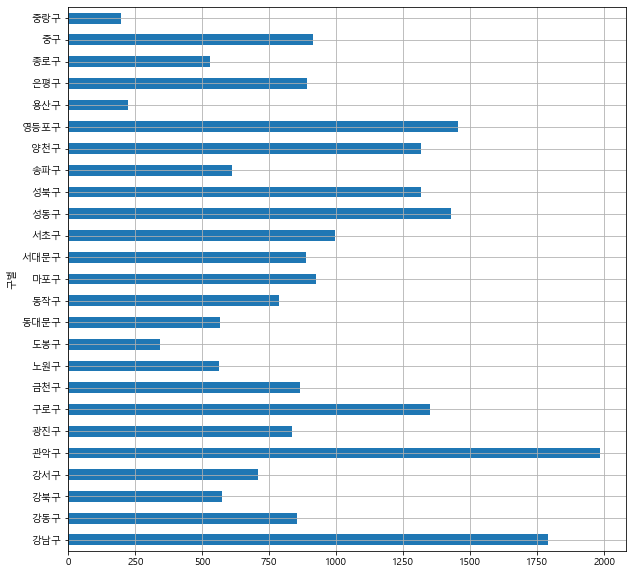

In [26]:
result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

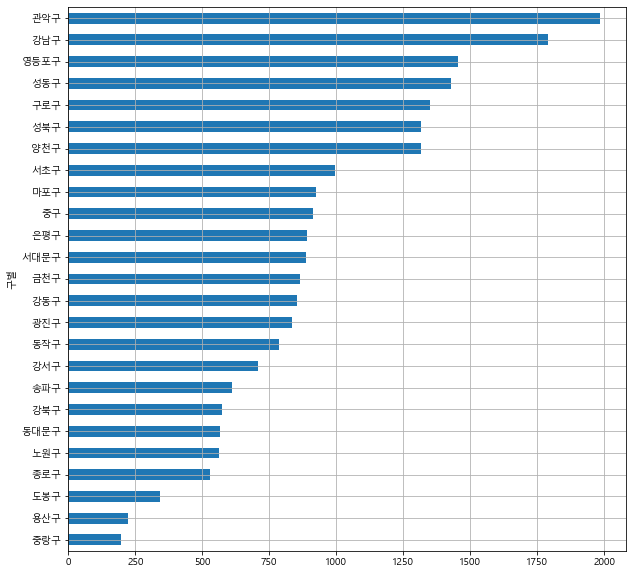

In [27]:
# cctv갯수가 많은순으로 정렬한 뒤 그래프 그리기
result['소계'].sort_values().plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

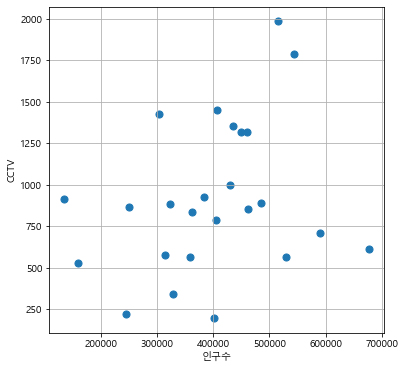

In [28]:
plt.figure(figsize=(6,6))
plt.scatter(result['인구수'], result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [29]:
fp1 =np.polyfit(result['인구수'], result['소계'], 1)
fp1

array([9.92108198e-04, 5.21301527e+02])

In [30]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)
fy = f1(fx)

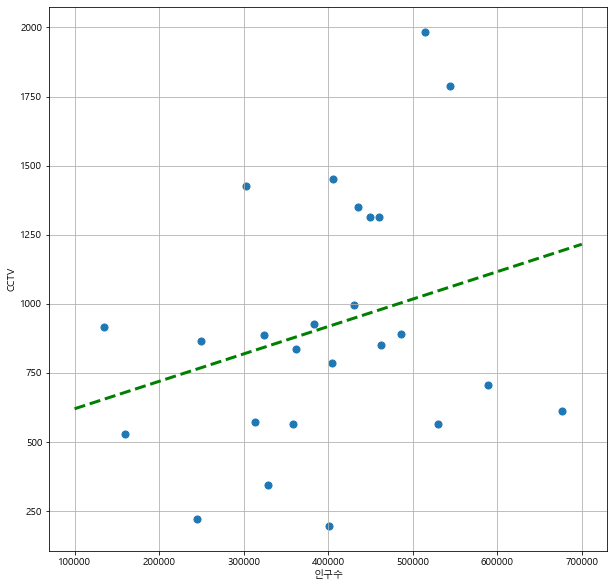

In [31]:
plt.figure(figsize=(10,10))
plt.scatter(result['인구수'], result['소계'], s=50)
plt.plot(fx,fy, ls='dashed', lw=3, color ='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [32]:
result['오차'] = np.abs(result['소계'] - f1(result['인구수']))
result_sort = result.sort_values('오차', ascending=False)
result_sort.head()

,소계,최근증가율,인구수,내국인,외국인,고령자,외국인비율,고령자비율,오차
구별,,,,,,,,,
관악구,1984,130.957096,514555,498574,15981,78206,3.105790,15.198764,952.204239
강남구,1790,138.544892,544085,539235,4850,73942,0.891405,13.590156,728.907284
중랑구,196,NaN,400989,395997,4992,68658,1.244922,17.122165,723.126001
성동구,1428,299.371069,302695,295591,7104,45372,2.346917,14.989346,606.392282
송파구,612,222.545455,676673,670331,6342,92149,0.937233,13.617951,580.634358


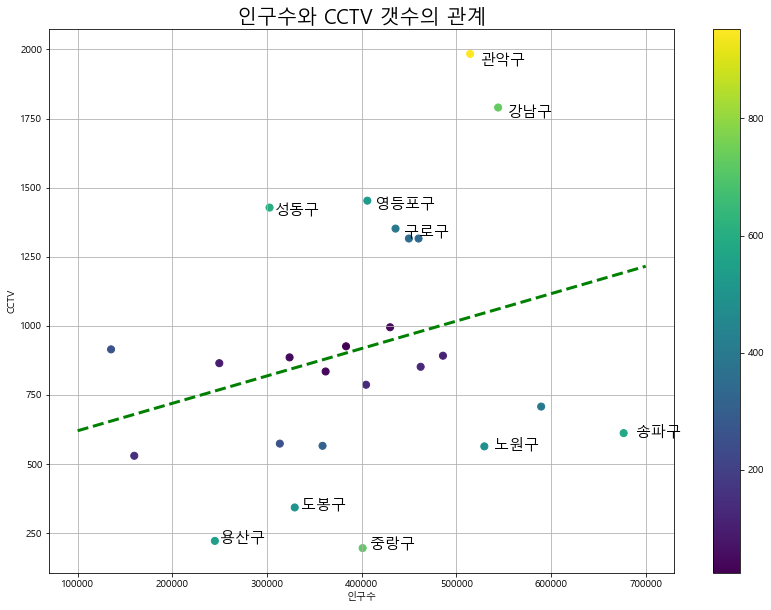

In [33]:
plt.figure(figsize=(14,10))
plt.scatter(result['인구수'], result['소계'], c=result['오차'], s=50)
plt.plot(fx, fy, ls='dashed', lw=3, color='g')

for i in range(10): 
    plt.text(result_sort['인구수'][i]*1.02, result_sort['소계'][i]*0.98,
             result_sort.index[i], fontsize=15)

plt.grid(True)
plt.title('인구수와 CCTV 갯수의 관계', fontsize=20)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.colorbar()    
plt.show()

In [35]:
result.to_csv('./results/서울시인구수와CCTV.csv')